In [10]:
import os
import Data_util
from Data_util import LEGEND
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 图片和语义分割图的主目录
base_data_path = './Data/Segmentation/Zurich_dataset_v1.0'
IMG_path = os.path.join(base_data_path, 'images_tif')
LABEL_path = os.path.join(base_data_path, 'groundtruth')

# 图片和语义分割图的地址
test_img_path = 'Data/Segmentation/Zurich_dataset_v1.0/images_tif/zh16.tif'
test_label_path = './Data/Segmentation/Zurich_dataset_v1.0/groundtruth/zh16_GT.tif'

In [3]:
# 读取语义分割图，以label的方式也就是(height,width)
label_test = Data_util.ReadImgByPath(test_label_path, is_label=True)
# 读取语义分割图，以非label的方式也就是(3, height,width),与类别的编码关系见Data_util的LEGEND
label_test_n = Data_util.ReadImgByPath(test_label_path, is_label=False)
# 读取图像
image_test = Data_util.ReadImgByPath(test_img_path)

print(label_test.shape)
print(label_test_n.shape)
print(image_test.shape)

(1146, 872)
(3, 1146, 872)
(4, 1146, 872)


In [4]:
# 计数工具，用于统计一个语义分割图（label形式）的类别分布
print(Data_util.Count(label_test))
# 对语义分割图做one hot编码，把(height, width)的label变成(height, width, num_of_label)的样子
one_hot_label = Data_util.one_hot_encode(label_test,9)
'''
    255    255    255;  % Background
      0      0      0;  % Roads
    100    100    100;  % Buildings
      0    125      0;  % Trees
      0    255      0;  % Grass
    150     80      0;  % Bare Soil
      0      0    150;  % Water
    255    255      0;  % Railways
    150    150    255]; % Swimming Pools 
'''
# 这边随机找几个像素点进行验证,对应方式是上边注释
test_m = 100
test_n = 198
print(one_hot_label[test_m, test_n,:])
print(label_test[test_m,test_n])
print(label_test_n[:, test_m,test_n])

Counting, please wait......
The count of label 0 is 215365
The count of label 1 is 215658
The count of label 2 is 243816
The count of label 3 is 62922
The count of label 4 is 4273
The count of label 5 is 5315
The count of label 6 is 251963
The count of label 7 is 0
The count of label 8 is 0
Counted successfully!
{'0': 215365, '1': 215658, '2': 243816, '3': 62922, '4': 4273, '5': 5315, '6': 251963, '7': 0, '8': 0}
[0 0 1 0 0 0 0 0 0]
2
[100 100 100]


In [5]:
# 对图像进行切割做数据增强，size是切割后图片的大小，stride是切割时slide windows的步长
image_list, label_list = Data_util.Crop(image_test, label_test, size = 224, stride = 100)

0 0 224 0 224
1 0 224 100 324
2 0 224 200 424
3 0 224 300 524
4 0 224 400 624
5 0 224 500 724
6 0 224 600 824
7 100 324 0 224
8 100 324 100 324
9 100 324 200 424
10 100 324 300 524
11 100 324 400 624
12 100 324 500 724
13 100 324 600 824
14 200 424 0 224
15 200 424 100 324
16 200 424 200 424
17 200 424 300 524
18 200 424 400 624
19 200 424 500 724
20 200 424 600 824
21 300 524 0 224
22 300 524 100 324
23 300 524 200 424
24 300 524 300 524
25 300 524 400 624
26 300 524 500 724
27 300 524 600 824
28 400 624 0 224
29 400 624 100 324
30 400 624 200 424
31 400 624 300 524
32 400 624 400 624
33 400 624 500 724
34 400 624 600 824
35 500 724 0 224
36 500 724 100 324
37 500 724 200 424
38 500 724 300 524
39 500 724 400 624
40 500 724 500 724
41 500 724 600 824
42 600 824 0 224
43 600 824 100 324
44 600 824 200 424
45 600 824 300 524
46 600 824 400 624
47 600 824 500 724
48 600 824 600 824
49 700 924 0 224
50 700 924 100 324
51 700 924 200 424
52 700 924 300 524
53 700 924 400 624
54 700 924 500

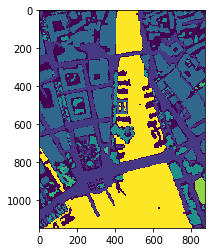

In [12]:
plt.imshow(label_test)

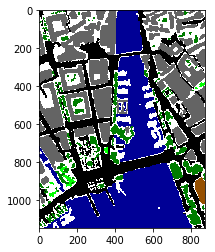

In [13]:
plt.imshow(np.transpose(label_test_n, (1,2,0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


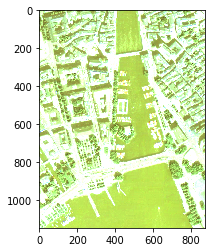

In [17]:
plt.imshow(np.transpose(image_test[0:3,:,:], (1,2,0)))

In [ ]:
# 根据目录，读取所有图片和语义分割图的图像，组成list
image_list = Data_util.ReadImgList(IMG_path)
label_list = Data_util.ReadImgList(LABEL_path, is_label=True)

(4, 1295, 1364)
(4, 833, 881)
(4, 926, 943)
(4, 1001, 1068)
(4, 1107, 1182)
(4, 812, 984)
(4, 1639, 1672)
(4, 1179, 1830)
(4, 1342, 1447)
(4, 1476, 1524)
(4, 786, 910)
(4, 622, 782)
(4, 957, 1050)
(4, 1217, 1692)
(4, 1123, 811)
(4, 1146, 872)
(4, 1025, 1112)
(4, 748, 800)
(4, 729, 1223)
(4, 1066, 1491)
(1295, 1364)
(833, 881)
(926, 943)
(1001, 1068)
(1107, 1182)
(812, 984)
(1639, 1672)
(1179, 1830)
(1342, 1447)
(1476, 1524)
(786, 910)
(622, 782)
(957, 1050)
(1217, 1692)
(1123, 811)


In [ ]:
print(len(image_list))
for i in range(20): 
    print(image_list[i].shape)
print(len(label_list))
for i in range(20): 
    print(label_list[i].shape)
print(label_list[2])